# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nelson Lau
- **Email:** integralvektor@gmail.com
- **ID Dicoding:** MC006D5Y2185

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi musim terhadap jumlah peminjaman sepeda ?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda ?
- Bagaimana pengaruh suhu udara terhadap jumlah peminjaman sepeda dalam sehari ?
- Bagaimana pengaruh pola penggunaan sepeda berdasarkan jam dalam sehari ?

## Import Semua Packages/Library yang Digunakan

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as plx
import matplotlib.ticker as mticker

## Data Wrangling

### Gathering Data

In [70]:
#Akan ditampilkan tabel dari dataset day.csv
day_df=pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [71]:
#Akan ditampilkan data dari dataset hour.csv
hour_df=pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [72]:
#Akan ditampilkan tipe data dari dataset day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
dapat dilihat bahwa jumlah datanya sudah sesuai. Namun, terdapat tipe data dteday yang menurut saya kurang tepat sehingga untuk perubahan data tersebut akan dilakukan di bagian cleaning data.

In [73]:
#Akan ditampilkan tipe data dari dataset hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:** sama seperti dataset day.csv yang akan diubah hanya tipe data dari dteday.

In [74]:
#Memastikan apakah dataset day_df tidak mengalami missing values
day_df.isnull().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


dataframe day_df tidak mengalami missing values

In [75]:
#Memastikan apakah dataset hour_df tidak mengalami missing values
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


dataframe hour_df tidak mengalami missing values

In [76]:
#Memeriksa jumlah duplikasi dataset day_df
print("Jumlah duplikasi:",day_df.duplicated().sum())

Jumlah duplikasi: 0


dataframe day_df tidak memiliki duplikasi

In [77]:
#Memeriksa jumlah duplikasi dataset hour_df
print("Jumlah duplikasi:",hour_df.duplicated().sum())

Jumlah duplikasi: 0


dataframe hour_df tidak memiliki duplikasi

In [78]:
#Menamplikan parameter statistik dataset day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [79]:
#Menampilkan paramter statistik dataset hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data


1. Menghapus kolom yang tidak akan digunakan seperti 'instant',
 'casual', 'registered', 'atemp' karena tidak ada hubungan dengan data yang akan diolah.
2. Akan diubah tipe data pada kolom dteday dari 'object' menjadi 'datetime'.
3. Pada kolom 'season', 'yr', 'mnth', 'weekday', 'weathersit', 'temp' datanya masih berupa int disini akan kita ubah menjadi tipe kategori.
4. Akan diganti judul kolom agar mudah dipahami.
5. Kolom yang sudah diubah menjadi tipe kategori akan dikonversi agar mudah dipahami.


**Drop Kolom Data**

In [80]:
#akan dihapus kolom 'instant', 'casual', 'registered', 'atemp' pada dataset day_df
day_df.drop(['instant', 'casual', 'registered', 'atemp'], axis=1, inplace=True)
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [81]:
#akan dihapus kolom 'instant', 'casual', 'registered', 'atemp' pada dataset hour_df
hour_df.drop(['instant', 'casual', 'registered', 'atemp'], axis=1, inplace=True)
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


**Mengubah tipe data kolom dteday**

In [82]:
#akan diubah tipe data kolom dteday dari object menjadi datetime pada dataset day_df dan hour_df
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   hum         731 non-null    float64       
 10  windspeed   731 non-null    float64       
 11  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 68.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype      

**Mengubah tipe data int menjadi kategori**

In [83]:
#akan diubah tipe data 'season', 'yr', 'mnth', 'weekday', 'weathersit' menjadi tipe kategori pada dataset day_df dan hour_df.
columns=['season', 'yr', 'mnth', 'weekday', 'weathersit']
for column in columns :
  day_df[column] = day_df[column].astype('category')
  hour_df[column] = hour_df[column].astype('category')




**Mengganti judul kolom**

In [84]:
#akan diganti judul kolom dari dataset day_df agar mudah dipahami.
day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr' : 'hour',
    'holiday': 'is_holiday',
    'weekday': 'day_of_week',
    'workingday': 'is_workingday',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'hum': 'humidity',
    'cnt': 'count'}, inplace=True)
day_df.head()

,date,season,year,month,is_holiday,day_of_week,is_workingday,weather_condition,temperature,humidity,windspeed,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [85]:
#akan diganti judul kolom dari dataset hour_df agar mudah dipahami.
hour_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr' : 'hour',
    'holiday': 'is_holiday',
    'weekday': 'day_of_week',
    'workingday': 'is_workingday',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'hum': 'humidity',
    'cnt': 'count'}, inplace=True)
hour_df.head()

,date,season,year,month,hour,is_holiday,day_of_week,is_workingday,weather_condition,temperature,humidity,windspeed,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


**Mengonversi isi kolom**

In [86]:
#akan dikonversi isi kolom 'season', 'year', 'month', 'day_of_week', 'weather_condition', 'temperature' dari dataframe day_df dan hour_df
#Mengonversi kolom season: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df.season.replace((1,2,3,4),('Spring','Summer','Fall','Winter'),inplace=True)
hour_df.season.replace((1,2,3,4),('Spring','Summer','Fall','Winter'),inplace=True)

#Mengonversi kolom year: 0:2011, 1:2012
day_df.year.replace((0,1),('2011','2012'),inplace=True)
hour_df.year.replace((0,1),('2011','2012'),inplace=True)

#Mengonversi kolom month: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:June, 7:July, 8:Aug, 9:Sept, 10:Oct, 11:Nov, 12:Des
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','February','March','April','May','June','July','Augustust','September','October','November','December'),inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','February','March','April','May','June','July','Augustust','September','October','November','December'),inplace=True)

#Mengonversi kolom day_of_week: 0:Sunday, 1:Monday 2:Tuesday, 3:Wednesday, 4:Thursday, 5:Friday, 6:Saturday
day_df.day_of_week.replace((0,1,2,3,4,5,6),('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'),inplace=True)
hour_df.day_of_week.replace((0,1,2,3,4,5,6),('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'),inplace=True)

#Mengonversi kolom weather_condition: 1:Clear, 2:Mist, 3:Rain, 4:Heavy Rain
day_df.weather_condition.replace((1,2,3,4),('Clear','Mist','Rain','Heavy Rain'),inplace=True)
hour_df.weather_condition.replace((1,2,3,4),('Clear','Mist','Rain','Heavy Rain'),inplace=True)



<ipython-input-86-fe763eba2093>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-86-fe763eba2093>:3: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.

<ipython-input-86-fe763eba2093>:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inpla

In [87]:
#Menampilakan tabel day_df
day_df.head()

,date,season,year,month,is_holiday,day_of_week,is_workingday,weather_condition,temperature,humidity,windspeed,count
0,2011-01-01,Spring,2011,January,0,Saturday,0,Mist,0.344167,0.805833,0.160446,985
1,2011-01-02,Spring,2011,January,0,Sunday,0,Mist,0.363478,0.696087,0.248539,801
2,2011-01-03,Spring,2011,January,0,Monday,1,Clear,0.196364,0.437273,0.248309,1349
3,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear,0.200000,0.590435,0.160296,1562
4,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear,0.226957,0.436957,0.186900,1600


In [88]:
#Menampilkan tabel hour_df
hour_df.head()

,date,season,year,month,hour,is_holiday,day_of_week,is_workingday,weather_condition,temperature,humidity,windspeed,count
0,2011-01-01,Spring,2011,January,0,0,Saturday,0,Clear,0.24,0.81,0.0,16
1,2011-01-01,Spring,2011,January,1,0,Saturday,0,Clear,0.22,0.80,0.0,40
2,2011-01-01,Spring,2011,January,2,0,Saturday,0,Clear,0.22,0.80,0.0,32
3,2011-01-01,Spring,2011,January,3,0,Saturday,0,Clear,0.24,0.75,0.0,13
4,2011-01-01,Spring,2011,January,4,0,Saturday,0,Clear,0.24,0.75,0.0,1


**Insight:**
1. Menghapus kolom yang tidak akan digunakan seperti 'instant',
 'casual', 'registered', 'atemp' karena tidak ada hubungan dengan data yang akan diolah. ✓
2. Akan diubah tipe data pada kolom dteday dari 'object' menjadi 'datetime'. ✓
3. Pada kolom 'season', 'yr', 'mnth', 'weekday', 'weathersit', 'temp' datanya masih berupa int disini akan kita ubah menjadi tipe kategori. ✓
4. Akan diganti judul kolom agar mudah dipahami. ✓
5. Kolom yang sudah diubah menjadi tipe kategori akan dikonversi agar mudah dipahami. ✓

## Exploratory Data Analysis (EDA)

**Explore Data hour_df**

In [89]:
#Menampilkan rangkuman statistik dataset hour_df
hour_df.describe()

,date,hour,is_holiday,is_workingday,temperature,humidity,windspeed,count
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,11.546752,0.028770,0.682721,0.496987,0.627229,0.190098,189.463088
min,2011-01-01 00:00:00,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,6.000000,0.000000,0.000000,0.340000,0.480000,0.104500,40.000000
50%,2012-01-02 00:00:00,12.000000,0.000000,1.000000,0.500000,0.630000,0.194000,142.000000
75%,2012-07-02 00:00:00,18.000000,0.000000,1.000000,0.660000,0.780000,0.253700,281.000000
max,2012-12-31 00:00:00,23.000000,1.000000,1.000000,1.000000,1.000000,0.850700,977.000000
std,NaN,6.914405,0.167165,0.465431,0.192556,0.192930,0.122340,181.387599


Berdasarkan informasi statistik diatas, diperoleh informasi bahwa terdapat jumlah pelanggan sebanyak 17379. Berdasarkan data yang ditampilkan pada kolom hour dengan range antara 00.00 sampai 23.59, rata-rata penyewaan terjadi pada jam 11.54 dengan standar deviasi 6.91. Terdapat juga data pada kolom temperature dengan range antara 0.02 sampai 1.00, rata-rata penyewaan terjadi pada suhu 0.496987

Berdasarkan tabel tersebut, dapat diketahui bahwa pelanggan yang menyewa sepeda paling tinggi terjadi pada jam 17.00 sedangkan paling sedikit terjadi pada jam 04.00

In [90]:
#Akan ditinjau pola suhu terhadap jumlah penggunaan sepeda
hour_df.groupby(by="temperature").agg({"count":["sum"]})

,count
,sum
temperature,
0.02,712
0.04,570
0.06,672
0.08,480
0.10,2514
0.12,4440
0.14,7605
0.16,15083


In [91]:
#Akan ditinnjau pola jam terhadap jumlah penggunaan sepeda
hour_df.groupby(by="hour").agg({"count":["sum"]})

,count
,sum
hour,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


Berdasarkan tabel tersebut, dapat diketahui bahwa pelanggan yang menyewa sepeda paling tinggi terjadi pada suhu 0.72 sedangkan paling sedikit terjadi pada suhu 1.00

In [92]:
#Menampilkan rangkuman statistik dataset day_df secara keseluruhan
day_df.describe()

,date,is_holiday,is_workingday,temperature,humidity,windspeed,count
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,0.028728,0.683995,0.495385,0.627894,0.190486,4504.348837
min,2011-01-01 00:00:00,0.000000,0.000000,0.059130,0.000000,0.022392,22.000000
25%,2011-07-02 12:00:00,0.000000,0.000000,0.337083,0.520000,0.134950,3152.000000
50%,2012-01-01 00:00:00,0.000000,1.000000,0.498333,0.626667,0.180975,4548.000000
75%,2012-07-01 12:00:00,0.000000,1.000000,0.655417,0.730209,0.233214,5956.000000
max,2012-12-31 00:00:00,1.000000,1.000000,0.861667,0.972500,0.507463,8714.000000
std,NaN,0.167155,0.465233,0.183051,0.142429,0.077498,1937.211452


Dari tabel statistik dataset day_df akan digunakan untuk memaparkan data yang diminta yaitu musim dan cuaca

In [93]:
#Akan ditinjau jumlah penyewaan berdasarkan musim
day_df.groupby(by='season').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-93-e10cebdd4eba>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



count                            
         max   min         mean      sum
season                                  
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Fall    8714  1115  5644.303191  1061129
Winter  8555    22  4728.162921   841613

Berdasarkan data diatas diperoleh bahwa penyewaan sepeda terbanyak terjadi saat musim Fall, sedangkan paling sedikit terjadi saat musim Spring

In [94]:
#Akan ditampilkan jumlah penyewaan berdasarkan cuaca
day_df.groupby(by='weather_condition').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-94-474bb7b14979>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



count                           
                    max  min         mean      sum
weather_condition                                 
Clear              8714  431  4876.786177  2257952
Mist               8362  605  4035.862348   996858
Rain               4639   22  1803.285714    37869

Berdasarkan data diatas, dapat disimpulkan bahwa rata-rata para penyewa sepeda paling banyak menyewa ketika cuaca sedang clear/cerah sedangkan paling sedikit ketika cuaca sedang rain/hujan

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi musim terhadap jumlah peminjaman sepeda ?

<ipython-input-103-ae11fccd376f>:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-103-ae11fccd376f>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




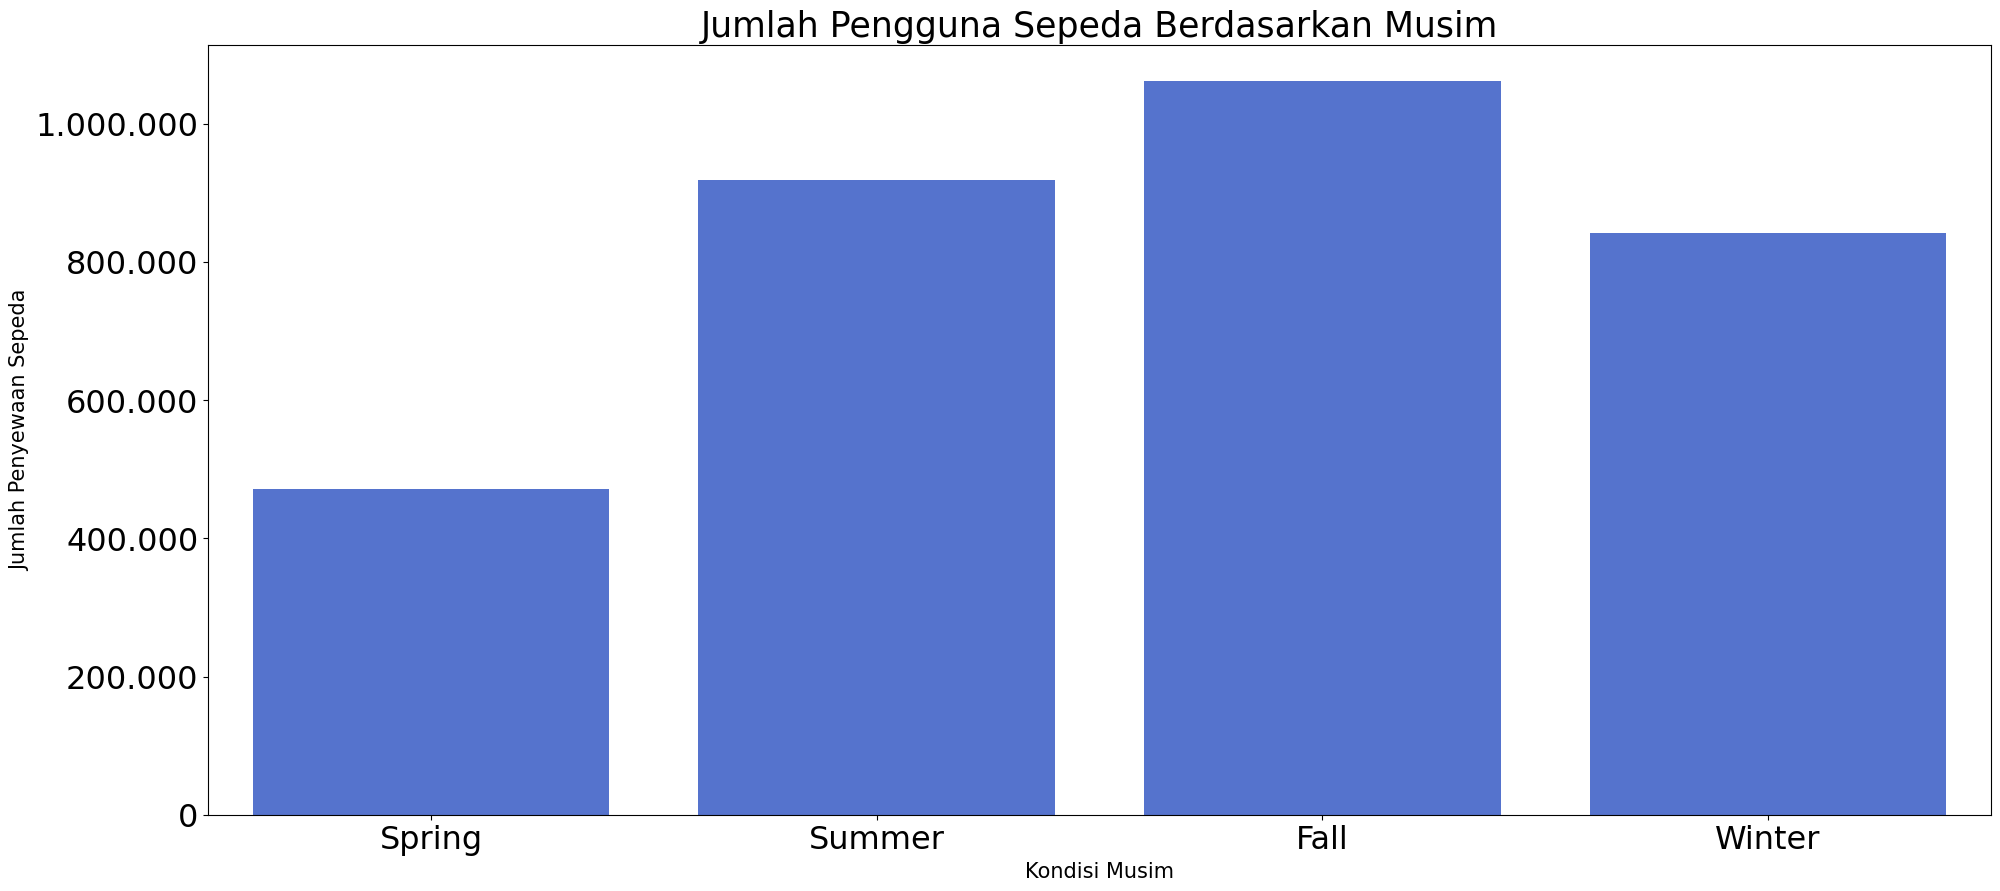

In [103]:
import matplotlib.ticker as mticker

# Memberikan kode warna untuk grafik yang akan digunakan
# Warna yang digunakan akan sama dengan grafik yang lain agar terlihat bagus ketika menggunakan dashboard di streamlit
warna_musim = ["#4169E1", "#4169E1", "#4169E1", "#4169E1"]

# Mengagregasi data untuk mendapatkan total jumlah penyewaan per musim
total_season_df = day_df.groupby("season", as_index=False)["count"].sum()

# Membuat plot grafik
fig, ax = plt.subplots(figsize=(23, 10))
sn.barplot(
    y="count",
    x="season",
    data=total_season_df.sort_values(by="season", ascending=False),
    palette=warna_musim,
    ax=ax
)

# Membuat sumbu y agar range angka terlihat bagus
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(",", ".")))

# Membuat judul grafik
ax.set_title("Jumlah Pengguna Sepeda Berdasarkan Musim", fontsize=25)
ax.set_ylabel("Jumlah Penyewaan Sepeda", fontsize=15)
ax.set_xlabel("Kondisi Musim", fontsize=15)
ax.tick_params(axis='x', labelsize=23)
ax.tick_params(axis='y', labelsize=23)

# Menampilkan plot
plt.show()


Berdasarkan grafik diatas penyewaan sepeda paling banyak terjadi saat musim Fall dengan jumlah sebanyak 1061129 sedangkan penyewaan sepeda paling sedikit terjadi saat musim Spring dengan jumlah 471348

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda ?

<ipython-input-104-a9539118df45>:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-104-a9539118df45>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




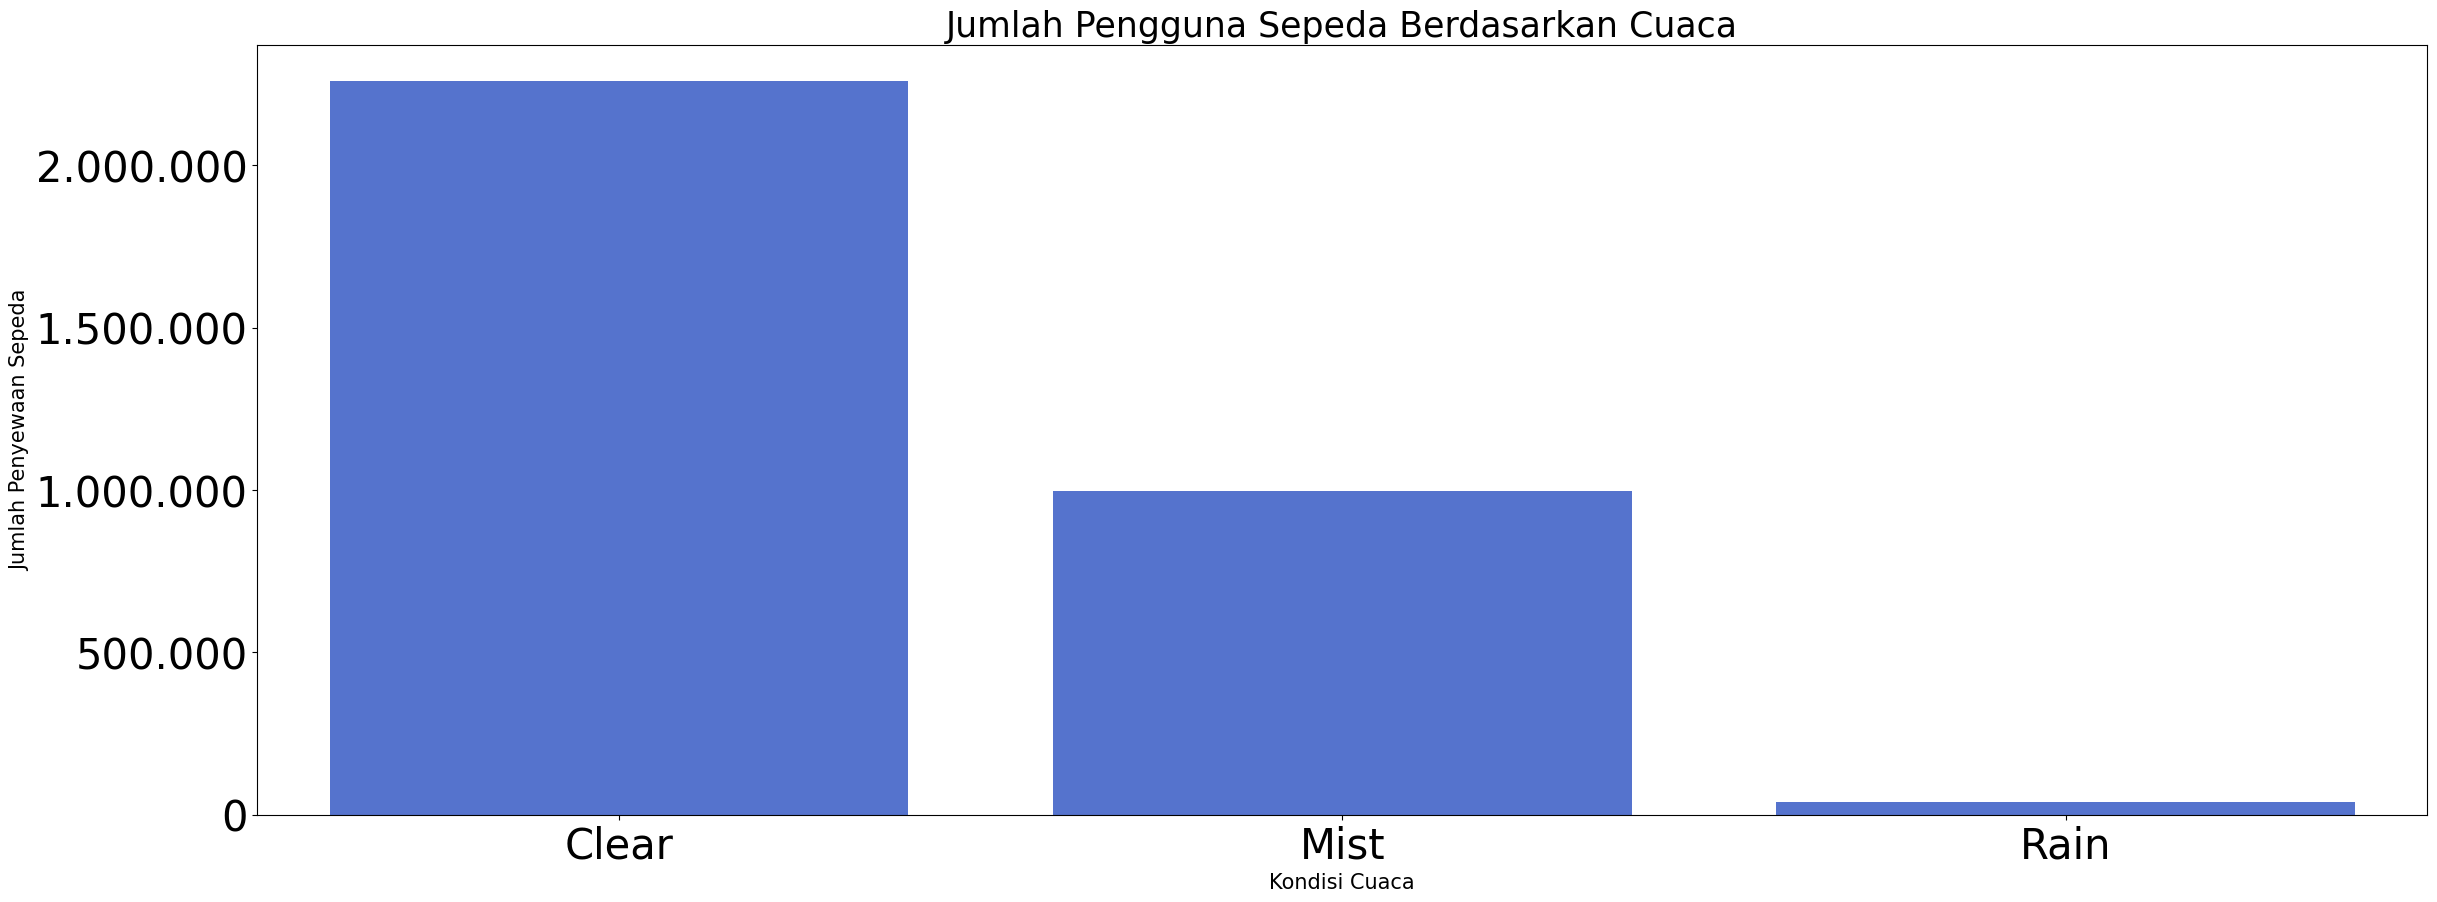

In [104]:
import matplotlib.ticker as mticker

# Memberikan kode warna untuk grafik yang akan digunakan
warna_musim = ["#4169E1", "#4169E1", "#4169E1"]

# Mengagregasi data untuk mendapatkan total jumlah penyewaan per kondisi cuaca
total_weather_df = day_df.groupby("weather_condition", as_index=False)["count"].sum()

# Membuat plot grafik
fig, ax = plt.subplots(figsize=(28, 10))
sn.barplot(
    y="count",
    x="weather_condition",
    data=total_weather_df.sort_values(by="weather_condition", ascending=False),
    palette=warna_musim,
    ax=ax
)

# Membuat sumbu y agar range angka terlihat bagus
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(",", ".")))

# Mengatur judul grafik
ax.set_title("Jumlah Pengguna Sepeda Berdasarkan Cuaca", loc="center", fontsize=25)
ax.set_ylabel("Jumlah Penyewaan Sepeda", fontsize=15)
ax.set_xlabel("Kondisi Cuaca", fontsize=15)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)

# Menampilkan plot
plt.show()


Berdasarkan grafik diatas penyewaan sepeda paling banyak terjadi saat Cuaca sedang Cerah dengan jumlah sebanyak 2257952 sedangkan penyewaan sepeda paling sedikit terjadi saat Cuaca sedang Hujan dengan jumlah 37869

### Pertanyaan 3: Bagaimana pengaruh pola penggunaan sepeda berdasarkan jam dalam sehari ?

In [105]:
# Membuat inisialisasi untuk grafik yang akan digunakan
fig = plx.scatter(hour_df, x="temperature", y="count", title="Jumlah Penyewaan Sepeda Berdasarkan Suhu")

# Mengupdate label pada sumbu x dan y
fig.update_xaxes(title="Suhu")
fig.update_yaxes(title="Jumlah Penyewaan Sepeda")

# Menampilkan judul di tengah
fig.update_layout(title_x=0.5)

# Menampilkan grafik
fig.show()

Berdasarkan visualisasi diatas, diperoleh fakta bahwa semakin tinggi suhu akan semakin banyak yang melakukan penyewaan sepeda

### Pertanyaan 4: Bagaimana pengaruh pola penggunaan sepeda berdasarkan jam dalam sehari ?

<ipython-input-106-73a7786b772e>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-106-73a7786b772e>:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




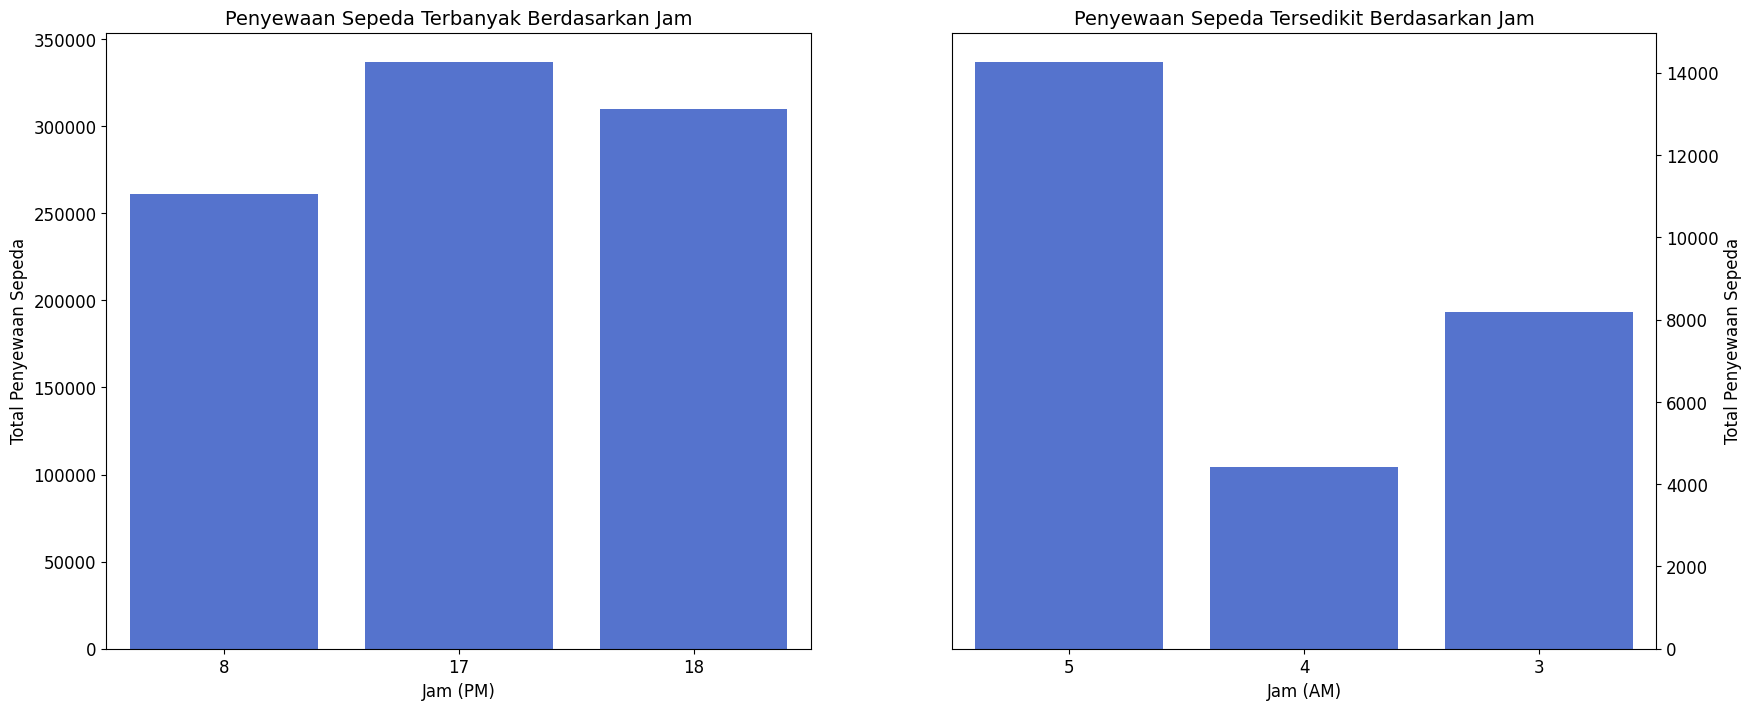

In [106]:
# Melakukan agregasi pada dataset hour_df
sum_order_items_df = hour_df.groupby("hour")["count"].sum().reset_index()

# Mengambil beberapa jam terbanyak dan tersedikit
teratas3_hour = sum_order_items_df.nlargest(3, 'count')
terbawah3_hour = sum_order_items_df.nsmallest(3, 'count')

# Membuat bar chart untuk melihat perbedaan penyewaan sepeda berdasarkan jam
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Membuat barplot untuk 3 jam penyewa sepeda terbanyak
sn.barplot(
    x="hour",
    y="count",
    data=teratas3_hour,
    palette=["#4169E1", "#4169E1", "#4169E1"],
    ax=ax[0]
)

# Mengatur label dan judul untuk subplot pertama
ax[0].set_ylabel("Total Penyewaan Sepeda", fontsize=12)
ax[0].set_xlabel("Jam (PM)", fontsize=12)
ax[0].set_title("Penyewaan Sepeda Terbanyak Berdasarkan Jam", fontsize=14)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].tick_params(axis='x', labelsize=12)

# Membuat barplot untuk 3 jam penyewa sepeda tersedikit
sn.barplot(
    x="hour",
    y="count",
    data=terbawah3_hour,
    palette=["#4169E1", "#4169E1", "#4169E1"],
    ax=ax[1]
)

# Mengatur label dan judul untuk subplot kedua
ax[1].set_ylabel("Total Penyewaan Sepeda", fontsize=12)
ax[1].set_xlabel("Jam (AM)", fontsize=12)
ax[1].set_title("Penyewaan Sepeda Tersedikit Berdasarkan Jam", fontsize=14)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', labelsize=12)

# Menampilkan plot
plt.show()

Berdasarkan grafik diatas diperoleh informasi bahwa penyewaan sepeda terbanyak dilakukan pada saat jam 17.00 sedangkan penyewaan sepeda tersedikit dilakukan pada saat jam 04.00

## Conclusion

- **Conclusion Pertanyaan 1:** Hasil visualisasi yang ditampilkan menunjukkan penyewaan sepeda terbanyak dilakukan saat **musim fall** hal ini mungkin disebabkan oleh cuaca yang tidak terlalu ekstrem seperti musim panas dan dingin, sedangkan penyewaan sepeda tersedikit terjadi saat **musim spring** hal ini mungkin disebabkan dengan kondisi cuaca yang masih tidak stabil.
- **Conclution pertanyaan 2:** Hasil visualisasi yang ditampilkan menunjukkan penyewaan sepeda terbanyak dilakukan saat **cuaca clear** hal ini menunjukkan bahwa kondisi cuaca yang baik sangat mendukung aktivitas bersepeda, sedangkan penyewaan sepeda tersedikit terjadi saat **cuaca rain** hal ini menunjukkan kemungkinan disebabkan oleh kondisi jalan yang licin dan ketidaknyamanan saat berkendara dalam hujan.
- **Conclution pertanyaan 3:** Hasil visualisasi yang ditampilkan menunjukkan **korelasi positif** antara suhu dengan jumlah penyewaan. Korelasi positif tersebut menunjukkan bahwa semakin **tinggi suhu**, **semakin banyak** orang yang melakukan penyewaan. Hal tersebut juga didukung dari conclution sebelumnya terkait faktor cuaca yang mempengaruhi jumlah penyewaan.
- **Conclution pertanyaan 4:** Hasil visualisasi yang ditampilkan menunjukkan penyewaan sepeda paling tinggi terjadi pada **jam 17.00**, diikuti oleh **08.00** dan **18.00** hal ini menunjukkan penggunaan sepeda banyak digunakan saat jam sibuk seperti saat berangkat kerja dan pulang kerja, sedangkan penyewaan paling rendah terjadi pada **jam 04.00**, diikuti oleh **03.00** dan **05.00** hal ini sangat masuk akal karena pada saat jam tersebut sebagian besar orang masih beristirahat.

## Analisis Lanjutan

```
# This is formatted as code
```



### Analisis Clustering




In [110]:
#Total pengguna berdasarkan musim
season_total = day_df.groupby("season").agg({"count": "sum"}).rename(columns={"count": "total_users"}).reset_index()
season_total

<ipython-input-110-96ad00f2919d>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,season,total_users
0,Spring,471348
1,Summer,918589
2,Fall,1061129
3,Winter,841613


Mengindentifikasi kelompok pengguna yang cenderung melakukan penyewaan sepeda saat musim Fall

In [114]:
#Total pengguna berdasarkan hari kerja
workingday_total = day_df.groupby("is_workingday").agg({"count": "sum"}).rename(columns={"count": "total_users"}).reset_index()
workingday_total

,is_workingday,total_users
0,0,1000269
1,1,2292410


Mengindentifikasi kelompok pengguna yang cenderung melakukan penyewaan sepeda saat hari kerja